# Uvoz potrebnih modulov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import color,io
import os

# Funkcija krožne Houghove transformacije

In [2]:
def bubble_size(img_path,sf=3,lt=10,ht=50):
    """Vrne velikost kroznice v pikslih."""
    img = io.imread(img_path)
    edges = canny(img, sigma=sf, low_threshold=lt, high_threshold=ht)
    hough_radii = np.arange(10, 50, 1)
    hough_res = hough_circle(edges, hough_radii)
    _, _, _, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=2)
    return max(radii)

# Pot do mape z posnetkom

In [3]:
mapa = str(input('Vnesite pot datoteke? '))

Vnesite pot datoteke? C:\Users\Jure Podobnikar\Desktop\Slike


# Nabor slik za obdelavo

In [4]:
slike=[]

for file in os.listdir(mapa):
    if file.endswith(".jpg"):
        slike.append(os.path.join(mapa, file))

# Dolocitev radija mehurčka na vsaki sliki

In [7]:
radiji=[];

korak=30

for i in range(1,len(slike),korak):
    radiji.append(bubble_size(slike[i]))
    
print(radiji);    

[15, 15, 31, 36, 40, 43, 44, 42, 38, 30, 12, 18, 22, 21, 15, 15, 18, 14, 16, 16]


# Izris meritev

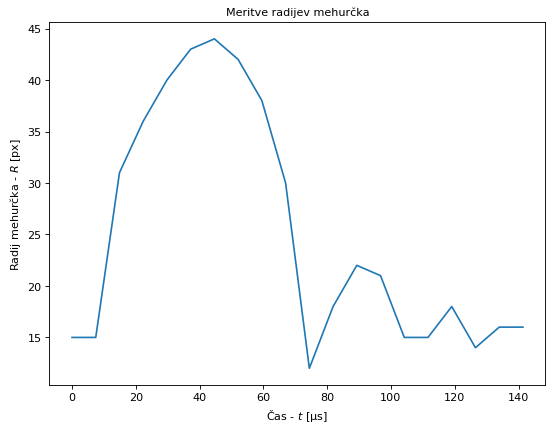

In [8]:
t=[(i-1)*0.248*korak for i in range(1,len(radiji)+1)]

fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t, radiji)

plt.title('Meritve radijev mehurčka', fontsize = 10);
plt.ylabel('Radij mehurčka - $R$ [px]')
plt.xlabel('Čas - $t$ [μs]')
plt.show()

# Shranitev meritev

In [7]:
np.savetxt("test.txt",radiji,fmt='%.2e',delimiter=",")